In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

# Read all 5 folds of data and calculate RMSE and R^2
rmses = []
r2s = []
for fold in range(1,6):
    # Read data
    predict_label = -1
    train_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/train/Fe_fold_{fold}.txt.csv', header=None)
    test_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/test/Fe_fold_{fold}.txt.csv', header=None)
    val_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/val/Fe_fold_{fold}.txt.csv', header=None)

    X_train_1, y_train_1 = np.array(train_data).T[[0,1,8,10]].T.astype(np.float64), np.array(train_data).T[predict_label].T.astype(np.float64)
    X_test_1, y_test_1 = np.array(test_data).T[[0,1,8,10]].T.astype(np.float64), np.array(test_data).T[predict_label].T.astype(np.float64)
    X_val, y_val = np.array(val_data).T[[0,1,8,10]].T.astype(np.float64), np.array(val_data).T[predict_label].T.astype(np.float64)

    # Concatenate X_val and X_test
    X_train = np.concatenate([X_val, X_train_1])
    y_train = np.concatenate([y_val, y_train_1])

    X_test = X_test_1
    y_test = y_test_1

    def quadratic_function(x, a, b, c, d, e):
        return a * x[:, 0] + b * x[:, 1] + c*x[:,2] + d*x[:, 3] + e
        return a * x[:, 0] + b * x[:, 1] + c*np.exp(x[:,2]) + d*x[:, 3] + e

    # Fit the model
    params, _ = curve_fit(quadratic_function, X_train_1, y_train_1)

    # Predict
    y_train_pred = quadratic_function(X_train, *params)
    y_test_pred = quadratic_function(X_test, *params)

    # Calculate RMSE and R^2
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)
    rmses.append(rmse)
    r2s.append(r2)
    print(f'Fold {fold} RMSE: {rmse:.4f}, R^2: {r2:.4f}')

# Calculate average RMSE and standard deviation
mean_rmse = np.mean(rmses)
std_rmse = np.std(rmses)
print(f'\nMean RMSE: {mean_rmse:.4f}')
print(f'Std RMSE: {std_rmse:.4f}')

# Calculate average R^2 and standard deviation
mean_r2 = np.mean(r2s)
std_r2 = np.std(r2s)
print(f'Mean R^2: {mean_r2:.4f}')
print(f'Std R^2: {std_r2:.4f}')



# Use the 3rd fold's data for further analysis
predict_label = -1
train_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/train/Fe_fold_1.txt.csv', header=None)
test_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/test/Fe_fold_1.txt.csv', header=None)
val_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/val/Fe_fold_1.txt.csv', header=None)

X_train_1, y_train_1 = np.array(train_data).T[[0,1,8,10]].T.astype(np.float64), np.array(train_data).T[predict_label].T.astype(np.float64)
X_test_1, y_test_1 = np.array(test_data).T[[0,1,8,10]].T.astype(np.float64), np.array(test_data).T[predict_label].T.astype(np.float64)
X_val, y_val = np.array(val_data).T[[0,1,8,10]].T.astype(np.float64), np.array(val_data).T[predict_label].T.astype(np.float64)

X_train = np.concatenate([X_val, X_train_1])
y_train = np.concatenate([y_val, y_train_1])

X_test = X_test_1
y_test = y_test_1

def quadratic_function(x, a, b, c, d, e):
    return a * x[:, 0] + b * x[:, 1] + c*x[:,2] + d*x[:, 3] + e

params, _ = curve_fit(quadratic_function, X_train_1, y_train_1)
print(params)
y_train_pred = quadratic_function(X_train, *params)
y_test_pred = quadratic_function(X_test, *params)

# Representability
y_represent = np.concatenate([y_train, y_test])
y_represent_pred = np.concatenate([y_train_pred, y_test_pred])
r_rmse = np.sqrt(mean_squared_error(y_represent, y_represent_pred))
r_r2 = r2_score(y_represent, y_represent_pred)
print('MLR ALL RMSE:', r_rmse)
print('MLR ALL R2:', r_r2)

# Generalizability
y_generalization = np.concatenate([y_test])
y_generalization_pred = np.concatenate([y_test_pred])
g_rmse = np.sqrt(mean_squared_error(y_generalization, y_generalization_pred))
g_r2 = r2_score(y_generalization, y_generalization_pred)
print('MLR Generalization RMSE:', g_rmse)
print('MLR Generalization R2:', g_r2)

Fold 1 RMSE: 0.0636, R^2: 0.2810
Fold 2 RMSE: 0.0612, R^2: 0.2435
Fold 3 RMSE: 0.0731, R^2: 0.0812
Fold 4 RMSE: 0.0860, R^2: -1.0263
Fold 5 RMSE: 0.0547, R^2: 0.4958

Mean RMSE: 0.0677
Std RMSE: 0.0109
Mean R^2: 0.0151
Std R^2: 0.5372
[ 0.34660871 -1.81950584 -0.23302332 -0.00606205  1.7484648 ]
MLR ALL RMSE: 0.06394787891971863
MLR ALL R2: 0.3601460731064805
MLR Generalization RMSE: 0.06355809810210931
MLR Generalization R2: 0.2809724071406746


/tmp/ipykernel_2287/4039348633.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


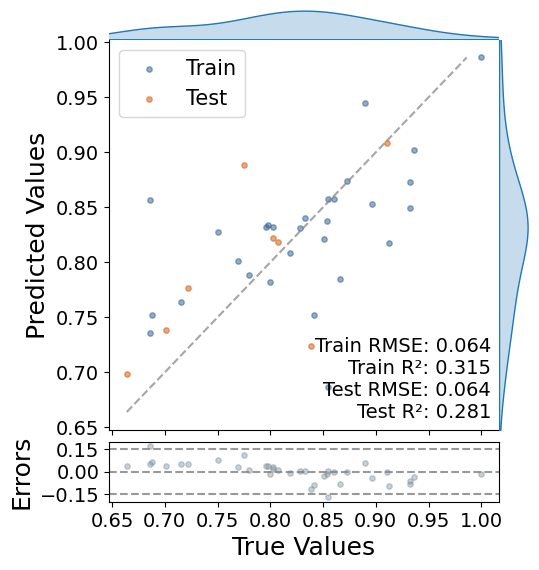

In [17]:
# Create the main scatter plot, marginal plots, and residual plot
import seaborn as sns
from scipy.stats import gaussian_kde
fig = plt.figure(figsize=(6, 6))
scatter_width = 0.65
scatter_height = 0.65
margin_size = 0.05
residual_height = 0.1
ax_scatter = plt.axes([0.2, 0.3, scatter_width, scatter_height])
ax_marg_x = plt.axes([0.2, 0.95, scatter_width, margin_size])
ax_marg_y = plt.axes([0.85, 0.3, margin_size, scatter_height])
ax_residual = plt.axes([0.2, 0.28 - residual_height, scatter_width, residual_height], sharex=ax_scatter)

# Main scatter plot - Plot the training and test data points separately
errors_train = y_train_pred - y_train
errors_gen = y_generalization_pred - y_generalization
# Calculate the RMSE and R2 for the training and test sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_rmse = np.sqrt(mean_squared_error(y_generalization, y_generalization_pred))
test_r2 = r2_score(y_generalization, y_generalization_pred)

# Training set data points (blue)
ax_scatter.scatter(y_train, y_train_pred, c='#2E5C8A', s=15, alpha=0.5, label='Train')
# Test set data points (red) 
ax_scatter.scatter(y_generalization, y_generalization_pred, c='#D35400', s=15, alpha=0.5, label='Test')
ax_scatter.legend(fontsize=15)

ax_scatter.set_ylabel('Predicted Values', fontsize=18)
ax_scatter.tick_params(axis='y', labelsize=14)

# Display RMSE and R2
ax_scatter.text(0.98, 0.02, f"Train RMSE: {train_rmse:.3f}\nTrain R²: {train_r2:.3f}\nTest RMSE: {test_rmse:.3f}\nTest R²: {test_r2:.3f}", 
                transform=ax_scatter.transAxes, fontsize=14,
                verticalalignment='bottom', horizontalalignment='right')

# Add diagonal line
true_values = np.concatenate([y_train, y_generalization])
predicted_values = np.concatenate([y_train_pred, y_generalization_pred])
ax_scatter.plot([min(true_values), max(predicted_values)], [min(true_values), max(predicted_values)], '--'
                , c='gray', alpha=0.7)

# KDE plot for x margin
sns.kdeplot(true_values, ax=ax_marg_x, fill=True)
ax_marg_x.set(xticks=[], yticks=[], xlim=ax_scatter.get_xlim(), xlabel='', ylabel='')

# KDE plot for y margin
sns.kdeplot(y=predicted_values, ax=ax_marg_y, fill=True)
ax_marg_y.set(xticks=[], yticks=[], ylim=ax_scatter.get_ylim(), xlabel='', ylabel='')

# Residual plot - Use a consistent color
ax_residual.scatter(true_values, predicted_values - true_values, c='#7A8B99', alpha=0.4, s=15)
ax_residual.axhline(0, color='gray', linestyle='--', alpha=0.8)
ax_residual.axhline(0.15, color='gray', linestyle='--', alpha=0.8)
ax_residual.axhline(-0.15, color='gray', linestyle='--', alpha=0.8)
ax_residual.set_xlabel('True Values', fontsize=18)
ax_residual.set_ylabel('Errors', fontsize=18)
ax_residual.set_yticks([-0.15, 0, 0.15])
ax_residual.set_ylim(-0.2, 0.2)
ax_residual.tick_params(axis='y', labelsize=14)
ax_residual.tick_params(axis='x', labelsize=14)

# Hide unnecessary spines and ticks
for ax in [ax_marg_x, ax_marg_y]:
    for spine in ax.spines.values():
        spine.set_visible(False)

ax_scatter.spines['top'].set_visible(False)
ax_scatter.spines['right'].set_visible(False)

# Synchronize the x-axis limits and hide x-ticks of the scatter plot
plt.setp(ax_scatter.get_xticklabels(), visible=False)
plt.tight_layout()

plt.show()
fig.savefig("./final_figs/MLR_Fe.png", dpi=600)

In [18]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
np.random.seed(0)

# Read all 5 folds of data and calculate RMSE and R^2
rmses = []
r2s = []
for fold in range(1,6):
    # Read data
    predict_label = -1
    train_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/train/Fe_fold_{fold}.txt.csv', header=None)
    test_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/test/Fe_fold_{fold}.txt.csv', header=None)
    val_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/val/Fe_fold_{fold}.txt.csv', header=None)

    X_train_1, y_train_1 = np.array(train_data)[:,:-1].astype(np.float64), np.array(train_data).T[predict_label].T.astype(np.float64)
    X_test_1, y_test_1 = np.array(test_data)[:,:-1].astype(np.float64), np.array(test_data).T[predict_label].T.astype(np.float64)
    X_val, y_val = np.array(val_data)[:,:-1].astype(np.float64), np.array(val_data).T[predict_label].T.astype(np.float64)

    # Concatenate X_val and X_test
    X_train = np.concatenate([X_val, X_train_1])
    y_train = np.concatenate([y_val, y_train_1])

    X_test = X_test_1
    y_test = y_test_1

    # Use XGBoost regression
    xgb = XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=0
    )

    # Fit the model
    xgb.fit(X_train_1, y_train_1)

    # Predict
    y_train_pred = xgb.predict(X_train)
    y_test_pred = xgb.predict(X_test)

    # Calculate RMSE and R^2
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)
    rmses.append(rmse)
    r2s.append(r2)
    print(f'Fold {fold} RMSE: {rmse:.4f}, R^2: {r2:.4f}')

# Calculate average RMSE and standard deviation
mean_rmse = np.mean(rmses)
std_rmse = np.std(rmses)
print(f'\nMean RMSE: {mean_rmse:.4f}')
print(f'Std RMSE: {std_rmse:.4f}')

# Calculate average R^2 and standard deviation
mean_r2 = np.mean(r2s)
std_r2 = np.std(r2s)
print(f'Mean R^2: {mean_r2:.4f}')
print(f'Std R^2: {std_r2:.4f}')
# Use the data of the 3rd fold for subsequent analysis
predict_label = -1
train_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/train/Fe_fold_1.txt.csv', header=None)
test_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/test/Fe_fold_1.txt.csv', header=None)
val_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/val/Fe_fold_1.txt.csv', header=None)

X_train_1, y_train_1 = np.array(train_data)[:,:-1].astype(np.float64), np.array(train_data).T[predict_label].T.astype(np.float64)
X_test_1, y_test_1 = np.array(test_data)[:,:-1].astype(np.float64), np.array(test_data).T[predict_label].T.astype(np.float64)
X_val, y_val = np.array(val_data)[:,:-1].astype(np.float64), np.array(val_data).T[predict_label].T.astype(np.float64)

X_train = np.concatenate([X_val, X_train_1])
y_train = np.concatenate([y_val, y_train_1])

X_test = X_test_1
y_test = y_test_1

xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=0
)
xgb.fit(X_train_1, y_train_1)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Representational ability
y_represent = np.concatenate([y_train, y_test])
y_represent_pred = np.concatenate([y_train_pred, y_test_pred])
r_rmse = np.sqrt(mean_squared_error(y_represent, y_represent_pred))
r_r2 = r2_score(y_represent, y_represent_pred)
print('XGBoost ALL RMSE:', r_rmse)
print('XGBoost ALL R2:', r_r2)

# Generalization ability
y_generalization = np.concatenate([y_test])
y_generalization_pred = np.concatenate([y_test_pred])
g_rmse = np.sqrt(mean_squared_error(y_generalization, y_generalization_pred))
g_r2 = r2_score(y_generalization, y_generalization_pred)
print('XGBoost Generalization RMSE:', g_rmse)
print('XGBoost Generalization R2:', g_r2)


Fold 1 RMSE: 0.0762, R^2: -0.0329
Fold 2 RMSE: 0.0811, R^2: -0.3264
Fold 3 RMSE: 0.0679, R^2: 0.2066
Fold 4 RMSE: 0.0756, R^2: -0.5671
Fold 5 RMSE: 0.0650, R^2: 0.2885

Mean RMSE: 0.0732
Std RMSE: 0.0059
Mean R^2: -0.0863
Std R^2: 0.3219
XGBoost ALL RMSE: 0.0440245566690711
XGBoost ALL R2: 0.6967376233311986
XGBoost Generalization RMSE: 0.07617914528252648
XGBoost Generalization R2: -0.032942061114242804


/tmp/ipykernel_2287/542220229.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


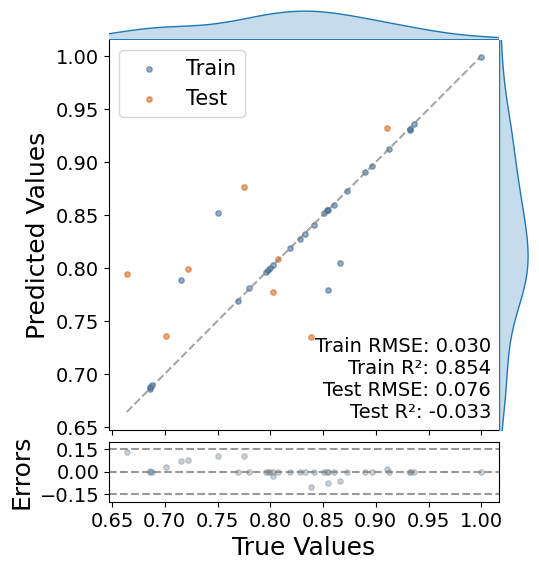

In [19]:
# Create the main scatter plot, marginal plots, and residual plot
import seaborn as sns
from scipy.stats import gaussian_kde
fig = plt.figure(figsize=(6, 6))
scatter_width = 0.65
scatter_height = 0.65
margin_size = 0.05
residual_height = 0.1
ax_scatter = plt.axes([0.2, 0.3, scatter_width, scatter_height])
ax_marg_x = plt.axes([0.2, 0.95, scatter_width, margin_size])
ax_marg_y = plt.axes([0.85, 0.3, margin_size, scatter_height])
ax_residual = plt.axes([0.2, 0.28 - residual_height, scatter_width, residual_height], sharex=ax_scatter)

# Main scatter plot - Plot the training and test data points separately
errors_train = y_train_pred - y_train
errors_gen = y_generalization_pred - y_generalization
# Calculate the RMSE and R2 for the training and test sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_rmse = np.sqrt(mean_squared_error(y_generalization, y_generalization_pred))
test_r2 = r2_score(y_generalization, y_generalization_pred)

# Training set data points (blue)
ax_scatter.scatter(y_train, y_train_pred, c='#2E5C8A', s=15, alpha=0.5, label='Train')
# Test set data points (red) 
ax_scatter.scatter(y_generalization, y_generalization_pred, c='#D35400', s=15, alpha=0.5, label='Test')
ax_scatter.legend(fontsize=15)

ax_scatter.set_ylabel('Predicted Values', fontsize=18)
ax_scatter.tick_params(axis='y', labelsize=14)

# Display RMSE and R2
ax_scatter.text(0.98, 0.02, f"Train RMSE: {train_rmse:.3f}\nTrain R²: {train_r2:.3f}\nTest RMSE: {test_rmse:.3f}\nTest R²: {test_r2:.3f}", 
                transform=ax_scatter.transAxes, fontsize=14,
                verticalalignment='bottom', horizontalalignment='right')

# Add diagonal line
true_values = np.concatenate([y_train, y_generalization])
predicted_values = np.concatenate([y_train_pred, y_generalization_pred])
ax_scatter.plot([min(true_values), max(predicted_values)], [min(true_values), max(predicted_values)], '--'
                , c='gray', alpha=0.7)

# KDE plot for x margin
sns.kdeplot(true_values, ax=ax_marg_x, fill=True)
ax_marg_x.set(xticks=[], yticks=[], xlim=ax_scatter.get_xlim(), xlabel='', ylabel='')

# KDE plot for y margin
sns.kdeplot(y=predicted_values, ax=ax_marg_y, fill=True)
ax_marg_y.set(xticks=[], yticks=[], ylim=ax_scatter.get_ylim(), xlabel='', ylabel='')

# Residual plot - Use a consistent color
ax_residual.scatter(true_values, predicted_values - true_values, c='#7A8B99', alpha=0.4, s=15)
ax_residual.axhline(0, color='gray', linestyle='--', alpha=0.8)
ax_residual.axhline(0.15, color='gray', linestyle='--', alpha=0.8)
ax_residual.axhline(-0.15, color='gray', linestyle='--', alpha=0.8)
ax_residual.set_xlabel('True Values', fontsize=18)
ax_residual.set_ylabel('Errors', fontsize=18)
ax_residual.set_yticks([-0.15, 0, 0.15])
ax_residual.set_ylim(-0.2, 0.2)
ax_residual.tick_params(axis='y', labelsize=14)
ax_residual.tick_params(axis='x', labelsize=14)

# Hide unnecessary spines and ticks
for ax in [ax_marg_x, ax_marg_y]:
    for spine in ax.spines.values():
        spine.set_visible(False)

ax_scatter.spines['top'].set_visible(False)
ax_scatter.spines['right'].set_visible(False)

# Synchronize the x-axis limits and hide x-ticks of the scatter plot
plt.setp(ax_scatter.get_xticklabels(), visible=False)
plt.tight_layout()

plt.show()
fig.savefig("./final_figs/XGBoost_Fe.png", dpi=600)

In [20]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
np.random.seed(0)

# Calculate RMSE and R^2 for all 5 folds
rmses = []
r2s = []
for fold in range(1,6):
    # Load data
    predict_label = -1
    train_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/train/Fe_fold_{fold}.txt.csv', header=None)
    test_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/test/Fe_fold_{fold}.txt.csv', header=None)
    val_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/val/Fe_fold_{fold}.txt.csv', header=None)

    X_train_1, y_train_1 = np.array(train_data)[:,:-1].astype(np.float64), np.array(train_data).T[predict_label].T.astype(np.float64)
    X_test_1, y_test_1 = np.array(test_data)[:,:-1].astype(np.float64), np.array(test_data).T[predict_label].T.astype(np.float64)
    X_val, y_val = np.array(val_data)[:,:-1].astype(np.float64), np.array(val_data).T[predict_label].T.astype(np.float64)

    # Concatenate validation and training data
    X_train = np.concatenate([X_val, X_train_1])
    y_train = np.concatenate([y_val, y_train_1])

    X_test = X_test_1
    y_test = y_test_1

    # Train SVR model
    svr = SVR(kernel='rbf', C=100, gamma='scale')

    # Fit model
    svr.fit(X_train_1, y_train_1)

    # Make predictions
    y_train_pred = svr.predict(X_train)
    y_test_pred = svr.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)
    rmses.append(rmse)
    r2s.append(r2)
    print(f'Fold {fold} RMSE: {rmse:.4f}, R^2: {r2:.4f}')

# Calculate mean and std of metrics
mean_rmse = np.mean(rmses)
std_rmse = np.std(rmses)
print(f'\nMean RMSE: {mean_rmse:.4f}')
print(f'Std RMSE: {std_rmse:.4f}')

mean_r2 = np.mean(r2s)
std_r2 = np.std(r2s)
print(f'Mean R^2: {mean_r2:.4f}')
print(f'Std R^2: {std_r2:.4f}')

# Use fold 1 data for further analysis
predict_label = -1
train_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/train/Fe_fold_1.txt.csv', header=None)
test_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/test/Fe_fold_1.txt.csv', header=None)
val_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/val/Fe_fold_1.txt.csv', header=None)

X_train_1, y_train_1 = np.array(train_data)[:,:-1].astype(np.float64), np.array(train_data).T[predict_label].T.astype(np.float64)
X_test_1, y_test_1 = np.array(test_data)[:,:-1].astype(np.float64), np.array(test_data).T[predict_label].T.astype(np.float64)
X_val, y_val = np.array(val_data)[:,:-1].astype(np.float64), np.array(val_data).T[predict_label].T.astype(np.float64)

X_train = np.concatenate([X_val, X_train_1])
y_train = np.concatenate([y_val, y_train_1])

X_test = X_test_1
y_test = y_test_1

svr = SVR(kernel='rbf', C=100, gamma='scale')
svr.fit(X_train_1, y_train_1)

y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Representation ability
y_represent = np.concatenate([y_train, y_test])
y_represent_pred = np.concatenate([y_train_pred, y_test_pred])
r_rmse = np.sqrt(mean_squared_error(y_represent, y_represent_pred))
r_r2 = r2_score(y_represent, y_represent_pred)
print('SVR ALL RMSE:', r_rmse)
print('SVR ALL R2:', r_r2)

# Generalization ability  
y_generalization = np.concatenate([y_test])
y_generalization_pred = np.concatenate([y_test_pred])
g_rmse = np.sqrt(mean_squared_error(y_generalization, y_generalization_pred))
g_r2 = r2_score(y_generalization, y_generalization_pred)
print('SVR Generalization RMSE:', g_rmse)
print('SVR Generalization R2:', g_r2)


Fold 1 RMSE: 0.0634, R^2: 0.2853
Fold 2 RMSE: 0.0681, R^2: 0.0630
Fold 3 RMSE: 0.0723, R^2: 0.1003
Fold 4 RMSE: 0.0843, R^2: -0.9508
Fold 5 RMSE: 0.0689, R^2: 0.1999

Mean RMSE: 0.0714
Std RMSE: 0.0071
Mean R^2: -0.0605
Std R^2: 0.4519
SVR ALL RMSE: 0.07223806157105536
SVR ALL R2: 0.18349148350580746
SVR Generalization RMSE: 0.06336660901447694
SVR Generalization R2: 0.2852984814063987


/tmp/ipykernel_2287/2004854249.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


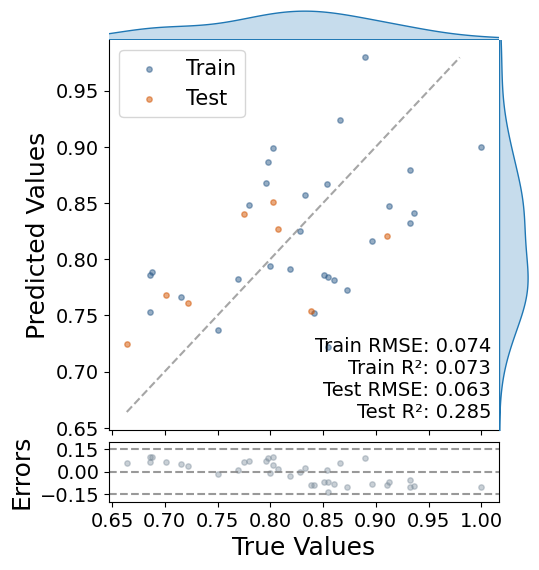

In [21]:
# Create the main scatter plot, marginal plots, and residual plot
import seaborn as sns
from scipy.stats import gaussian_kde
fig = plt.figure(figsize=(6, 6))
scatter_width = 0.65
scatter_height = 0.65
margin_size = 0.05
residual_height = 0.1
ax_scatter = plt.axes([0.2, 0.3, scatter_width, scatter_height])
ax_marg_x = plt.axes([0.2, 0.95, scatter_width, margin_size])
ax_marg_y = plt.axes([0.85, 0.3, margin_size, scatter_height])
ax_residual = plt.axes([0.2, 0.28 - residual_height, scatter_width, residual_height], sharex=ax_scatter)

# Main scatter plot - Plotting training and test data points separately
errors_train = y_train_pred - y_train
errors_gen = y_generalization_pred - y_generalization
# Calculating RMSE and R2 for training and test sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_rmse = np.sqrt(mean_squared_error(y_generalization, y_generalization_pred))
test_r2 = r2_score(y_generalization, y_generalization_pred)

# Training data points (blue)
ax_scatter.scatter(y_train, y_train_pred, c='#2E5C8A', s=15, alpha=0.5, label='Train')
# Test data points (red) 
ax_scatter.scatter(y_generalization, y_generalization_pred, c='#D35400', s=15, alpha=0.5, label='Test')
ax_scatter.legend(fontsize=15)

ax_scatter.set_ylabel('Predicted Values', fontsize=18)
ax_scatter.tick_params(axis='y', labelsize=14)

# Displaying RMSE and R2
ax_scatter.text(0.98, 0.02, f"Train RMSE: {train_rmse:.3f}\nTrain R²: {train_r2:.3f}\nTest RMSE: {test_rmse:.3f}\nTest R²: {test_r2:.3f}", 
                transform=ax_scatter.transAxes, fontsize=14,
                verticalalignment='bottom', horizontalalignment='right')

# Add diagonal line
true_values = np.concatenate([y_train, y_generalization])
predicted_values = np.concatenate([y_train_pred, y_generalization_pred])
ax_scatter.plot([min(true_values), max(predicted_values)], [min(true_values), max(predicted_values)], '--'
                , c='gray', alpha=0.7)

# KDE plot for x margin
sns.kdeplot(true_values, ax=ax_marg_x, fill=True)
ax_marg_x.set(xticks=[], yticks=[], xlim=ax_scatter.get_xlim(), xlabel='', ylabel='')

# KDE plot for y margin
sns.kdeplot(y=predicted_values, ax=ax_marg_y, fill=True)
ax_marg_y.set(xticks=[], yticks=[], ylim=ax_scatter.get_ylim(), xlabel='', ylabel='')

# Residual plot - Using a unified color
ax_residual.scatter(true_values, predicted_values - true_values, c='#7A8B99', alpha=0.4, s=15)
ax_residual.axhline(0, color='gray', linestyle='--', alpha=0.8)
ax_residual.axhline(0.15, color='gray', linestyle='--', alpha=0.8)
ax_residual.axhline(-0.15, color='gray', linestyle='--', alpha=0.8)
ax_residual.set_xlabel('True Values', fontsize=18)
ax_residual.set_ylabel('Errors', fontsize=18)
ax_residual.set_yticks([-0.15, 0, 0.15])
ax_residual.set_ylim(-0.2, 0.2)
ax_residual.tick_params(axis='y', labelsize=14)
ax_residual.tick_params(axis='x', labelsize=14)

# Hide unnecessary spines and ticks
for ax in [ax_marg_x, ax_marg_y]:
    for spine in ax.spines.values():
        spine.set_visible(False)

ax_scatter.spines['top'].set_visible(False)
ax_scatter.spines['right'].set_visible(False)

# Synchronize the x-axis limits and hide x-ticks of the scatter plot
plt.setp(ax_scatter.get_xticklabels(), visible=False)
plt.tight_layout()

plt.show()
fig.savefig("./final_figs/SVR_Fe.png", dpi=600)

In [22]:
# Use Random Forest for Regression
from sklearn.ensemble import RandomForestRegressor

# Read all 5 folds of data and calculate RMSE and R^2
rmses = []
r2s = []
for fold in range(1,6):
    # Read data
    predict_label = -1
    train_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/train/Fe_fold_{fold}.txt.csv', header=None)
    test_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/test/Fe_fold_{fold}.txt.csv', header=None)
    val_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/val/Fe_fold_{fold}.txt.csv', header=None)

    X_train_1, y_train_1 = np.array(train_data)[:,:-1].astype(np.float64), np.array(train_data).T[predict_label].T.astype(np.float64)
    X_test_1, y_test_1 = np.array(test_data)[:,:-1].astype(np.float64), np.array(test_data).T[predict_label].T.astype(np.float64)
    X_val, y_val = np.array(val_data)[:,:-1].astype(np.float64), np.array(val_data).T[predict_label].T.astype(np.float64)

    # Concatenate X_val and X_test
    X_train = np.concatenate([X_val, X_train_1])
    y_train = np.concatenate([y_val, y_train_1])

    X_test = X_test_1
    y_test = y_test_1

    # Use Random Forest for Regression
    rf = RandomForestRegressor(n_estimators=100, random_state=42)

    # Fit the model
    rf.fit(X_train_1, y_train_1)

    # Predict
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    # Calculate RMSE and R^2
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)
    rmses.append(rmse)
    r2s.append(r2)
    print(f'Fold {fold} RMSE: {rmse:.4f}, R^2: {r2:.4f}')

# Calculate mean RMSE and standard deviation
mean_rmse = np.mean(rmses)
std_rmse = np.std(rmses)
print(f'\nMean RMSE: {mean_rmse:.4f}')
print(f'Std RMSE: {std_rmse:.4f}')

# Calculate mean R^2 and standard deviation
mean_r2 = np.mean(r2s)
std_r2 = np.std(r2s)
print(f'Mean R^2: {mean_r2:.4f}')
print(f'Std R^2: {std_r2:.4f}')


# Use the data of the 3rd fold for subsequent analysis
predict_label = -1
train_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/train/Fe_fold_1.txt.csv', header=None)
test_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/test/Fe_fold_1.txt.csv', header=None)
val_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/val/Fe_fold_1.txt.csv', header=None)

X_train_1, y_train_1 = np.array(train_data)[:,:-1].astype(np.float64), np.array(train_data).T[predict_label].T.astype(np.float64)
X_test_1, y_test_1 = np.array(test_data)[:,:-1].astype(np.float64), np.array(test_data).T[predict_label].T.astype(np.float64)
X_val, y_val = np.array(val_data)[:,:-1].astype(np.float64), np.array(val_data).T[predict_label].T.astype(np.float64)

X_train = np.concatenate([X_val, X_train_1])
y_train = np.concatenate([y_val, y_train_1])

X_test = X_test_1
y_test = y_test_1

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_1, y_train_1)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Representational ability
y_represent = np.concatenate([y_train, y_test])
y_represent_pred = np.concatenate([y_train_pred, y_test_pred])
r_rmse = np.sqrt(mean_squared_error(y_represent, y_represent_pred))
r_r2 = r2_score(y_represent, y_represent_pred)
print('Random Forest ALL RMSE:', r_rmse)
print('Random Forest ALL R2:', r_r2)

# Generalization ability
y_generalization = np.concatenate([y_test])
y_generalization_pred = np.concatenate([y_test_pred])
g_rmse = np.sqrt(mean_squared_error(y_generalization, y_generalization_pred))
g_r2 = r2_score(y_generalization, y_generalization_pred)
print('Random Forest Generalization RMSE:', g_rmse)
print('Random Forest Generalization R2:', g_r2)

Fold 1 RMSE: 0.0765, R^2: -0.0415
Fold 2 RMSE: 0.0668, R^2: 0.0986
Fold 3 RMSE: 0.0736, R^2: 0.0698
Fold 4 RMSE: 0.0780, R^2: -0.6679
Fold 5 RMSE: 0.0653, R^2: 0.2829

Mean RMSE: 0.0720
Std RMSE: 0.0051
Mean R^2: -0.0516
Std R^2: 0.3253
Random Forest ALL RMSE: 0.04790340807714421
Random Forest ALL R2: 0.6409446714446314
Random Forest Generalization RMSE: 0.07649563214654796
Random Forest Generalization R2: -0.04154262161951339


/tmp/ipykernel_2287/4286086205.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


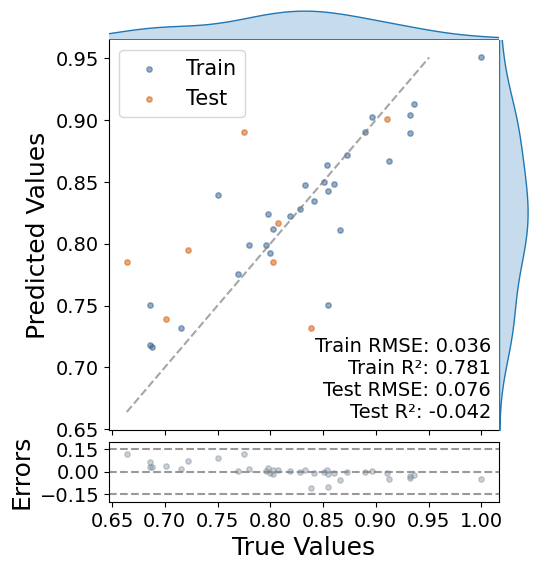

In [23]:
# Create the main scatter plot, marginal plots, and residual plot
import seaborn as sns
from scipy.stats import gaussian_kde
fig = plt.figure(figsize=(6, 6))
scatter_width = 0.65
scatter_height = 0.65
margin_size = 0.05
residual_height = 0.1
ax_scatter = plt.axes([0.2, 0.3, scatter_width, scatter_height])
ax_marg_x = plt.axes([0.2, 0.95, scatter_width, margin_size])
ax_marg_y = plt.axes([0.85, 0.3, margin_size, scatter_height])
ax_residual = plt.axes([0.2, 0.28 - residual_height, scatter_width, residual_height], sharex=ax_scatter)

# Main scatter plot - Plotting training and test data points separately
errors_train = y_train_pred - y_train
errors_gen = y_generalization_pred - y_generalization
# Calculating RMSE and R2 for training and test sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_rmse = np.sqrt(mean_squared_error(y_generalization, y_generalization_pred))
test_r2 = r2_score(y_generalization, y_generalization_pred)

# Training data points (blue)
ax_scatter.scatter(y_train, y_train_pred, c='#2E5C8A', s=15, alpha=0.5, label='Train')
# Test data points (red) 
ax_scatter.scatter(y_generalization, y_generalization_pred, c='#D35400', s=15, alpha=0.5, label='Test')
ax_scatter.legend(fontsize=15)

ax_scatter.set_ylabel('Predicted Values', fontsize=18)
ax_scatter.tick_params(axis='y', labelsize=14)

# Displaying RMSE and R2
ax_scatter.text(0.98, 0.02, f"Train RMSE: {train_rmse:.3f}\nTrain R²: {train_r2:.3f}\nTest RMSE: {test_rmse:.3f}\nTest R²: {test_r2:.3f}", 
                transform=ax_scatter.transAxes, fontsize=14,
                verticalalignment='bottom', horizontalalignment='right')

# Add diagonal line
true_values = np.concatenate([y_train, y_generalization])
predicted_values = np.concatenate([y_train_pred, y_generalization_pred])
ax_scatter.plot([min(true_values), max(predicted_values)], [min(true_values), max(predicted_values)], '--'
                , c='gray', alpha=0.7)

# KDE plot for x margin
sns.kdeplot(true_values, ax=ax_marg_x, fill=True)
ax_marg_x.set(xticks=[], yticks=[], xlim=ax_scatter.get_xlim(), xlabel='', ylabel='')

# KDE plot for y margin
sns.kdeplot(y=predicted_values, ax=ax_marg_y, fill=True)
ax_marg_y.set(xticks=[], yticks=[], ylim=ax_scatter.get_ylim(), xlabel='', ylabel='')

# Residual plot - Using a unified color
ax_residual.scatter(true_values, predicted_values - true_values, c='#7A8B99', alpha=0.4, s=15)
ax_residual.axhline(0, color='gray', linestyle='--', alpha=0.8)
ax_residual.axhline(0.15, color='gray', linestyle='--', alpha=0.8)
ax_residual.axhline(-0.15, color='gray', linestyle='--', alpha=0.8)
ax_residual.set_xlabel('True Values', fontsize=18)
ax_residual.set_ylabel('Errors', fontsize=18)
ax_residual.set_yticks([-0.15, 0, 0.15])
ax_residual.set_ylim(-0.2, 0.2)
ax_residual.tick_params(axis='y', labelsize=14)
ax_residual.tick_params(axis='x', labelsize=14)

# Hide unnecessary spines and ticks
for ax in [ax_marg_x, ax_marg_y]:
    for spine in ax.spines.values():
        spine.set_visible(False)

ax_scatter.spines['top'].set_visible(False)
ax_scatter.spines['right'].set_visible(False)

# Synchronize the x-axis limits and hide x-ticks of the scatter plot
plt.setp(ax_scatter.get_xticklabels(), visible=False)
plt.tight_layout()

plt.show()
fig.savefig("./final_figs/RF_Fe.png", dpi=600)

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
np.random.seed(0)

# dso original
print("DSR Simple")
# Define functions for different models
f1 = lambda x : x[:,3] + (-x[:,0]*x[:,3]*x[:,7]*np.exp(-x[:,1]) - x[:,1] + np.exp(np.exp(x[:,3])))/x[:,8]
f2 = lambda x : np.exp(x[:,0])/(x[:,4] + np.log(x[:,8]))
f3 = lambda x : -0.36242000140859357*x[:,10]*(x[:,8] - 2.1847196478682656)/(x[:,8] + np.log(x[:,8])) - x[:,5] + 0.36242000140859357*x[:,8] + np.log(x[:,10]) - 1.6885711949616571
f4 = lambda x : np.exp(x[:,3])/np.log(x[:,8])
f5 = lambda x : x[:,9] + (x[:,1] + (1.3951134352012697 - x[:,4])*(3.752160637333891 - 0.09196056992021953*x[:,10]))/(x[:,8] + 1)

# dso simple
# f0 = lambda x : (27.15353833205803*x[:,8] + 7.1862809159774095/x[:,6])*(np.exp(x[:,6]) - 0.6408953469171315)
f_list = [f1,f2,f3,f4,f5]


rmses = []
r2s = []
for fold in range(5):
    # Load data
    predict_label = -1
    train_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/train/Fe_fold_{fold+1}.txt.csv', header=None)
    test_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/test/Fe_fold_{fold+1}.txt.csv', header=None)
    val_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/val/Fe_fold_{fold+1}.txt.csv', header=None)

    X_train_1, y_train_1 = np.array(train_data)[:,:-1].astype(np.float64), np.array(train_data).T[predict_label].T.astype(np.float64)
    X_test_1, y_test_1 = np.array(test_data)[:,:-1].astype(np.float64), np.array(test_data).T[predict_label].T.astype(np.float64)
    X_val, y_val = np.array(val_data)[:,:-1].astype(np.float64), np.array(val_data).T[predict_label].T.astype(np.float64)

    # Concatenate X_val and X_test
    X_train = np.concatenate([X_val, X_train_1])
    y_train = np.concatenate([y_val, y_train_1])

    X_test = X_test_1
    y_test = y_test_1


    y_train_pred = f_list[fold](X_train)
    y_test_pred = f_list[fold](X_test)		

    # Calculate RMSE and R^2
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)
    rmses.append(rmse)
    r2s.append(r2)
    print(f'Fold {fold} RMSE: {rmse:.4f}, R^2: {r2:.4f}')

# Calculate mean and standard deviation of RMSE
mean_rmse = np.mean(rmses)
std_rmse = np.std(rmses)
print(f'\nMean RMSE: {mean_rmse:.4f}')
print(f'Std RMSE: {std_rmse:.4f}')

# Calculate mean and standard deviation of R^2
mean_r2 = np.mean(r2s)
std_r2 = np.std(r2s)
print(f'Mean R^2: {mean_r2:.4f}')
print(f'Std R^2: {std_r2:.4f}')


# Capability demonstration
predict_label = -1
train_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/train/Fe_fold_1.txt.csv', header=None)
test_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/test/Fe_fold_1.txt.csv', header=None)
val_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/val/Fe_fold_1.txt.csv', header=None)

X_train_1, y_train_1 = np.array(train_data)[:,:-1].astype(np.float64), np.array(train_data).T[predict_label].T.astype(np.float64)
X_test_1, y_test_1 = np.array(test_data)[:,:-1].astype(np.float64), np.array(test_data).T[predict_label].T.astype(np.float64)
X_val, y_val = np.array(val_data)[:,:-1].astype(np.float64), np.array(val_data).T[predict_label].T.astype(np.float64)

X_train = np.concatenate([X_val, X_train_1])
y_train = np.concatenate([y_val, y_train_1])

X_test = X_test_1
y_test = y_test_1

y_train_pred = f_list[2](X_train)
y_test_pred = f_list[2](X_test)

y_represent = np.concatenate([y_train, y_test])
y_represent_pred = np.concatenate([y_train_pred, y_test_pred])
r_rmse = np.sqrt(mean_squared_error(y_represent, y_represent_pred))
r_r2 = r2_score(y_represent, y_represent_pred)
print('ALL RMSE:', r_rmse)
print('ALL R2:', r_r2)

# Generalization capability
y_generalization = np.concatenate([y_test])
y_generalization_pred = np.concatenate([y_test_pred])
g_rmse = np.sqrt(mean_squared_error(y_generalization, y_generalization_pred))
g_r2 = r2_score(y_generalization, y_generalization_pred)
print('Generalization RMSE:', g_rmse)
print('Generalization R2:', g_r2)

DSR Simple
Fold 0 RMSE: 0.0584, R^2: 0.3925
Fold 1 RMSE: 0.0624, R^2: 0.2152
Fold 2 RMSE: 0.0656, R^2: 0.2600
Fold 3 RMSE: 0.0685, R^2: -0.2859
Fold 4 RMSE: 0.0504, R^2: 0.5719

Mean RMSE: 0.0611
Std RMSE: 0.0063
Mean R^2: 0.2307
Std R^2: 0.2865
ALL RMSE: 0.05860799140050211
ALL R2: 0.4625448523309186
Generalization RMSE: 0.06047595936353374
Generalization R2: 0.34901751482310206


/tmp/ipykernel_2287/2182505310.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


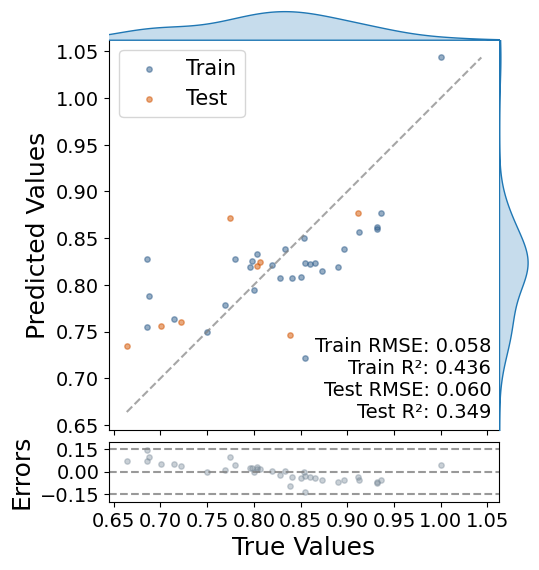

In [25]:
# Create the main scatter plot, marginal plots, and residual plot
import seaborn as sns
from scipy.stats import gaussian_kde
fig = plt.figure(figsize=(6, 6))
scatter_width = 0.65
scatter_height = 0.65
margin_size = 0.05
residual_height = 0.1
ax_scatter = plt.axes([0.2, 0.3, scatter_width, scatter_height])
ax_marg_x = plt.axes([0.2, 0.95, scatter_width, margin_size])
ax_marg_y = plt.axes([0.85, 0.3, margin_size, scatter_height])
ax_residual = plt.axes([0.2, 0.28 - residual_height, scatter_width, residual_height], sharex=ax_scatter)

# Main scatter plot - Plotting training and test set data points separately
errors_train = y_train_pred - y_train
errors_gen = y_generalization_pred - y_generalization
# Calculating RMSE and R2 for training and test sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_rmse = np.sqrt(mean_squared_error(y_generalization, y_generalization_pred))
test_r2 = r2_score(y_generalization, y_generalization_pred)

# Training set data points (blue)
ax_scatter.scatter(y_train, y_train_pred, c='#2E5C8A', s=15, alpha=0.5, label='Train')
# Test set data points (red)
ax_scatter.scatter(y_generalization, y_generalization_pred, c='#D35400', s=15, alpha=0.5, label='Test')
ax_scatter.legend(fontsize=15)

ax_scatter.set_ylabel('Predicted Values', fontsize=18)
ax_scatter.tick_params(axis='y', labelsize=14)

# Displaying RMSE and R2
ax_scatter.text(0.98, 0.02, f"Train RMSE: {train_rmse:.3f}\nTrain R²: {train_r2:.3f}\nTest RMSE: {test_rmse:.3f}\nTest R²: {test_r2:.3f}", 
                transform=ax_scatter.transAxes, fontsize=14,
                verticalalignment='bottom', horizontalalignment='right')

# Add diagonal line
true_values = np.concatenate([y_train, y_generalization])
predicted_values = np.concatenate([y_train_pred, y_generalization_pred])
ax_scatter.plot([min(true_values), max(predicted_values)], [min(true_values), max(predicted_values)], '--'
                , c='gray', alpha=0.7)

# KDE plot for x margin
sns.kdeplot(true_values, ax=ax_marg_x, fill=True)
ax_marg_x.set(xticks=[], yticks=[], xlim=ax_scatter.get_xlim(), xlabel='', ylabel='')

# KDE plot for y margin
sns.kdeplot(y=predicted_values, ax=ax_marg_y, fill=True)
ax_marg_y.set(xticks=[], yticks=[], ylim=ax_scatter.get_ylim(), xlabel='', ylabel='')

# Residual plot - Using a unified color
ax_residual.scatter(true_values, predicted_values - true_values, c='#7A8B99', alpha=0.4, s=15)
ax_residual.axhline(0, color='gray', linestyle='--', alpha=0.8)
ax_residual.axhline(0.15, color='gray', linestyle='--', alpha=0.8)
ax_residual.axhline(-0.15, color='gray', linestyle='--', alpha=0.8)
ax_residual.set_xlabel('True Values', fontsize=18)
ax_residual.set_ylabel('Errors', fontsize=18)
ax_residual.set_yticks([-0.15, 0, 0.15])
ax_residual.set_ylim(-0.2, 0.2)
ax_residual.tick_params(axis='y', labelsize=14)
ax_residual.tick_params(axis='x', labelsize=14)

# Hide unnecessary spines and ticks
for ax in [ax_marg_x, ax_marg_y]:
    for spine in ax.spines.values():
        spine.set_visible(False)

ax_scatter.spines['top'].set_visible(False)
ax_scatter.spines['right'].set_visible(False)

# Synchronize the x-axis limits and hide x-ticks of the scatter plot
plt.setp(ax_scatter.get_xticklabels(), visible=False)
plt.tight_layout()

plt.show()
fig.savefig("./final_figs/DSR_Fe.png", dpi=600)

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
np.random.seed(0)

# dso original
print("uDSR Simple")
# Define functions for data processing
f1 = lambda x : np.exp(x[:,2] + (-x[:,5] - np.log(x[:,8]) + 1.0)*np.exp(x[:,2]*np.exp(x[:,6])))
f2 = lambda x : np.exp(x[:,0])/np.log(x[:,0] - x[:,2]*(x[:,2] - x[:,6]) + x[:,8])
f3 = lambda x : np.exp(x[:,3])/np.log(x[:,3]*(x[:,6] + x[:,7] - np.exp(x[:,0]/x[:,2])) + x[:,8])
f4 = lambda x : (x[:,0] + x[:,2] + 2.71828182845905)/x[:,8]
f5 = lambda x : np.exp(np.log(np.log(x[:,8]))/np.log(np.log(x[:,8]) - 1.0))

# dso simple
# f0 = lambda x : (27.15353833205803*x[:,8] + 7.1862809159774095/x[:,6])*(np.exp(x[:,6]) - 0.6408953469171315)
f_list = [f1,f2,f3,f4,f5]


rmses = []
r2s = []
for fold in range(5):
    # Load data for each fold
    predict_label = -1
    train_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/train/Fe_fold_{fold+1}.txt.csv', header=None)
    test_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/test/Fe_fold_{fold+1}.txt.csv', header=None)
    val_data = pd.read_csv(f'./resource/datasets/srsd/1_aging_csv/val/Fe_fold_{fold+1}.txt.csv', header=None)

    X_train_1, y_train_1 = np.array(train_data)[:,:-1].astype(np.float64), np.array(train_data).T[predict_label].T.astype(np.float64)
    X_test_1, y_test_1 = np.array(test_data)[:,:-1].astype(np.float64), np.array(test_data).T[predict_label].T.astype(np.float64)
    X_val, y_val = np.array(val_data)[:,:-1].astype(np.float64), np.array(val_data).T[predict_label].T.astype(np.float64)

    # Concatenate validation and training data
    X_train = np.concatenate([X_val, X_train_1])
    y_train = np.concatenate([y_val, y_train_1])

    X_test = X_test_1
    y_test = y_test_1


    y_train_pred = f_list[fold](X_train)
    y_test_pred = f_list[fold](X_test)		

    # Calculate RMSE and R^2
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)
    rmses.append(rmse)
    r2s.append(r2)
    print(f'Fold {fold} RMSE: {rmse:.4f}, R^2: {r2:.4f}')

# Calculate average RMSE and standard deviation
mean_rmse = np.mean(rmses)
std_rmse = np.std(rmses)
print(f'\nMean RMSE: {mean_rmse:.4f}')
print(f'Std RMSE: {std_rmse:.4f}')

# Calculate average R^2 and standard deviation
mean_r2 = np.mean(r2s)
std_r2 = np.std(r2s)
print(f'Mean R^2: {mean_r2:.4f}')
print(f'Std R^2: {std_r2:.4f}')


# Capability demonstration
predict_label = -1
train_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/train/Fe_fold_1.txt.csv', header=None)
test_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/test/Fe_fold_1.txt.csv', header=None)
val_data = pd.read_csv('./resource/datasets/srsd/1_aging_csv/val/Fe_fold_1.txt.csv', header=None)

X_train_1, y_train_1 = np.array(train_data)[:,:-1].astype(np.float64), np.array(train_data).T[predict_label].T.astype(np.float64)
X_test_1, y_test_1 = np.array(test_data)[:,:-1].astype(np.float64), np.array(test_data).T[predict_label].T.astype(np.float64)
X_val, y_val = np.array(val_data)[:,:-1].astype(np.float64), np.array(val_data).T[predict_label].T.astype(np.float64)

X_train = np.concatenate([X_val, X_train_1])
y_train = np.concatenate([y_val, y_train_1])

X_test = X_test_1
y_test = y_test_1

y_train_pred = f_list[2](X_train)
y_test_pred = f_list[2](X_test)

y_represent = np.concatenate([y_train, y_test])
y_represent_pred = np.concatenate([y_train_pred, y_test_pred])
r_rmse = np.sqrt(mean_squared_error(y_represent, y_represent_pred))
r_r2 = r2_score(y_represent, y_represent_pred)
print('ALL RMSE:', r_rmse)
print('ALL R2:', r_r2)

# Generalization capability
y_generalization = np.concatenate([y_test])
y_generalization_pred = np.concatenate([y_test_pred])
g_rmse = np.sqrt(mean_squared_error(y_generalization, y_generalization_pred))
g_r2 = r2_score(y_generalization, y_generalization_pred)
print('Generalization RMSE:', g_rmse)
print('Generalization R2:', g_r2)

uDSR Simple
Fold 0 RMSE: 0.0612, R^2: 0.3343
Fold 1 RMSE: 0.0541, R^2: 0.4088
Fold 2 RMSE: 0.0800, R^2: -0.0989
Fold 3 RMSE: 0.0703, R^2: -0.3563
Fold 4 RMSE: 0.0647, R^2: 0.2946

Mean RMSE: 0.0661
Std RMSE: 0.0087
Mean R^2: 0.1165
Std R^2: 0.2948
ALL RMSE: 0.06461439049500049
ALL R2: 0.3467385122171247
Generalization RMSE: 0.0637676257097158
Generalization R2: 0.27622385535292215


/tmp/ipykernel_2287/1812241359.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


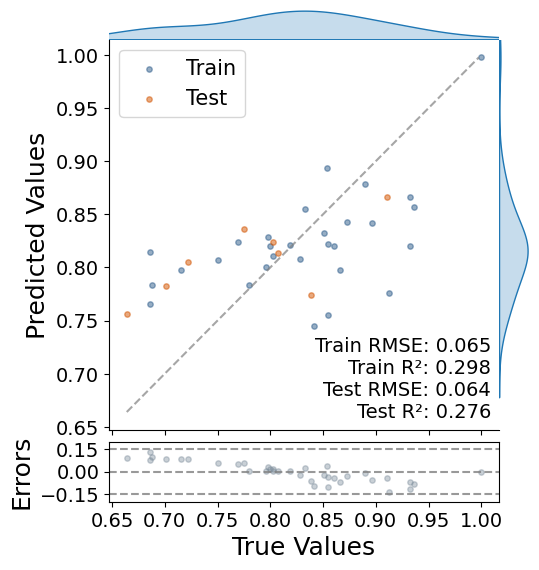

In [27]:
# Create the main scatter plot, marginal plots, and residual plot
import seaborn as sns
from scipy.stats import gaussian_kde
fig = plt.figure(figsize=(6, 6))
scatter_width = 0.65
scatter_height = 0.65
margin_size = 0.05
residual_height = 0.1
ax_scatter = plt.axes([0.2, 0.3, scatter_width, scatter_height])
ax_marg_x = plt.axes([0.2, 0.95, scatter_width, margin_size])
ax_marg_y = plt.axes([0.85, 0.3, margin_size, scatter_height])
ax_residual = plt.axes([0.2, 0.28 - residual_height, scatter_width, residual_height], sharex=ax_scatter)

# Main scatter plot 
errors_train = y_train_pred - y_train
errors_gen = y_generalization_pred - y_generalization
# 计算训练集和测试集的RMSE和R2
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_rmse = np.sqrt(mean_squared_error(y_generalization, y_generalization_pred))
test_r2 = r2_score(y_generalization, y_generalization_pred)

ax_scatter.scatter(y_train, y_train_pred, c='#2E5C8A', s=15, alpha=0.5, label='Train')

ax_scatter.scatter(y_generalization, y_generalization_pred, c='#D35400', s=15, alpha=0.5, label='Test')
ax_scatter.legend(fontsize=15)

ax_scatter.set_ylabel('Predicted Values', fontsize=18)
ax_scatter.tick_params(axis='y', labelsize=14)

ax_scatter.text(0.98, 0.02, f"Train RMSE: {train_rmse:.3f}\nTrain R²: {train_r2:.3f}\nTest RMSE: {test_rmse:.3f}\nTest R²: {test_r2:.3f}", 
                transform=ax_scatter.transAxes, fontsize=14,
                verticalalignment='bottom', horizontalalignment='right')

# Add diagonal line
true_values = np.concatenate([y_train, y_generalization])
predicted_values = np.concatenate([y_train_pred, y_generalization_pred])
ax_scatter.plot([min(true_values), max(predicted_values)], [min(true_values), max(predicted_values)], '--'
                , c='gray', alpha=0.7)

# KDE plot for x margin
sns.kdeplot(true_values, ax=ax_marg_x, fill=True)
ax_marg_x.set(xticks=[], yticks=[], xlim=ax_scatter.get_xlim(), xlabel='', ylabel='')

# KDE plot for y margin
sns.kdeplot(y=predicted_values, ax=ax_marg_y, fill=True)
ax_marg_y.set(xticks=[], yticks=[], ylim=ax_scatter.get_ylim(), xlabel='', ylabel='')

# Residual plot
ax_residual.scatter(true_values, predicted_values - true_values, c='#7A8B99', alpha=0.4, s=15)
ax_residual.axhline(0, color='gray', linestyle='--', alpha=0.8)
ax_residual.axhline(0.15, color='gray', linestyle='--', alpha=0.8)
ax_residual.axhline(-0.15, color='gray', linestyle='--', alpha=0.8)
ax_residual.set_xlabel('True Values', fontsize=18)
ax_residual.set_ylabel('Errors', fontsize=18)
ax_residual.set_yticks([-0.15, 0, 0.15])
ax_residual.set_ylim(-0.2, 0.2)
ax_residual.tick_params(axis='y', labelsize=14)
ax_residual.tick_params(axis='x', labelsize=14)

# Hide unnecessary spines and ticks
for ax in [ax_marg_x, ax_marg_y]:
    for spine in ax.spines.values():
        spine.set_visible(False)

ax_scatter.spines['top'].set_visible(False)
ax_scatter.spines['right'].set_visible(False)

# Synchronize the x-axis limits and hide x-ticks of the scatter plot
plt.setp(ax_scatter.get_xticklabels(), visible=False)
plt.tight_layout()

plt.show()
fig.savefig("./final_figs/uDSR_Fe.png", dpi=600)